## Batch Gradient Descent with Linear Regression from Scratch with Animation 

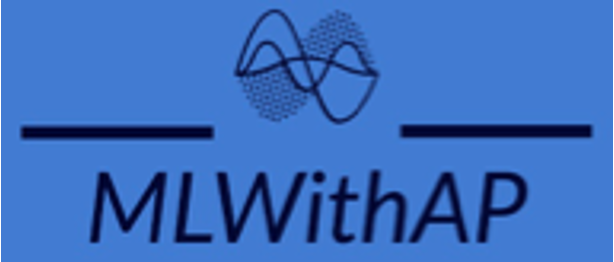

# What is Gradient Descent ? 


Gradient Descent is the most common **optimization algorithm** in machine learning and deep learning. It is used to optimize Cost/Loss function of machine and deep learning models.








# But what is optimization and why do we need it ?

Optimization refers to the task of minimizing/maximizing an objective function f(x) parameterized by x. In machine/deep learning terminology, it’s the task of minimizing the cost/loss function J(w) parameterized by the model’s parameters . Optimization algorithms (in case of minimization) have one of the following goals:


1. Find the global minimum of the objective function. This is feasible if the objective function is convex, i.e. any local minimum is a global minimum.


2. Find the lowest possible value of the objective function within its neighborhood. That’s usually the case if the objective function is not convex as the case in most deep learning problems.


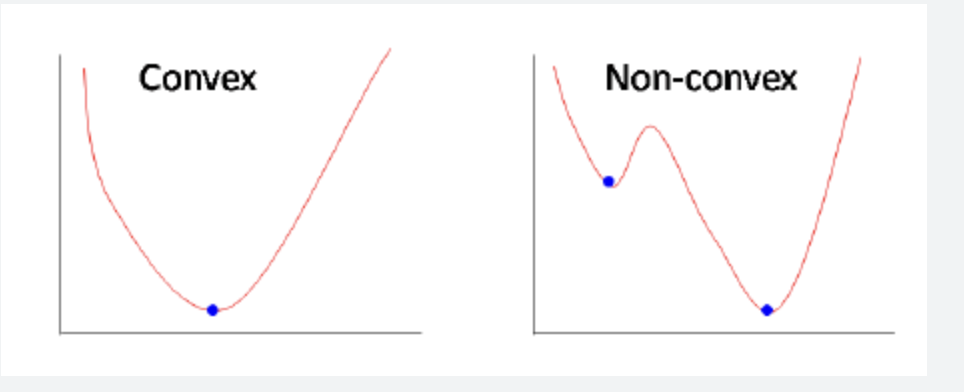

# Types of optimization algorithms

There are three kinds of optimization algorithms:


1. Optimization algorithm that is not iterative and simply solves for one point.




2. Optimization algorithm that is iterative in nature and converges to acceptable solution regardless of the parameters initialization such as gradient descent applied to logistic regression.




3. Optimization algorithm that is iterative in nature and applied to a set of problems that have non-convex cost functions such as neural networks. Therefore, parameters’ initialization plays a critical role in speeding up convergence and achieving lower error rates.


# Now back to Gradient Descent

Gradient Descent is the most common optimization algorithm in machine learning and deep learning. 


It is a first-order optimization algorithm. This means it only takes into account the first derivative when performing the updates on the parameters. 


On each iteration, we update the parameters in the opposite direction of the gradient of the objective function J(w) w.r.t the parameters where the gradient gives the direction of the steepest ascent. 



The size of the step we take on each iteration to reach the local minimum is determined by the learning rate α. 



Therefore, we follow the direction of the slope downhill until we reach a local minimum.

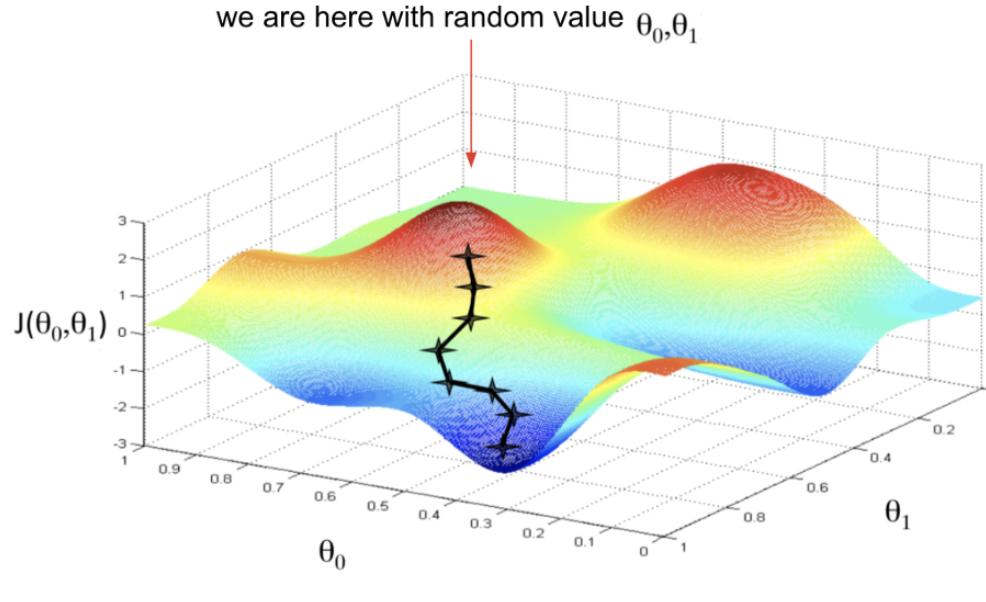


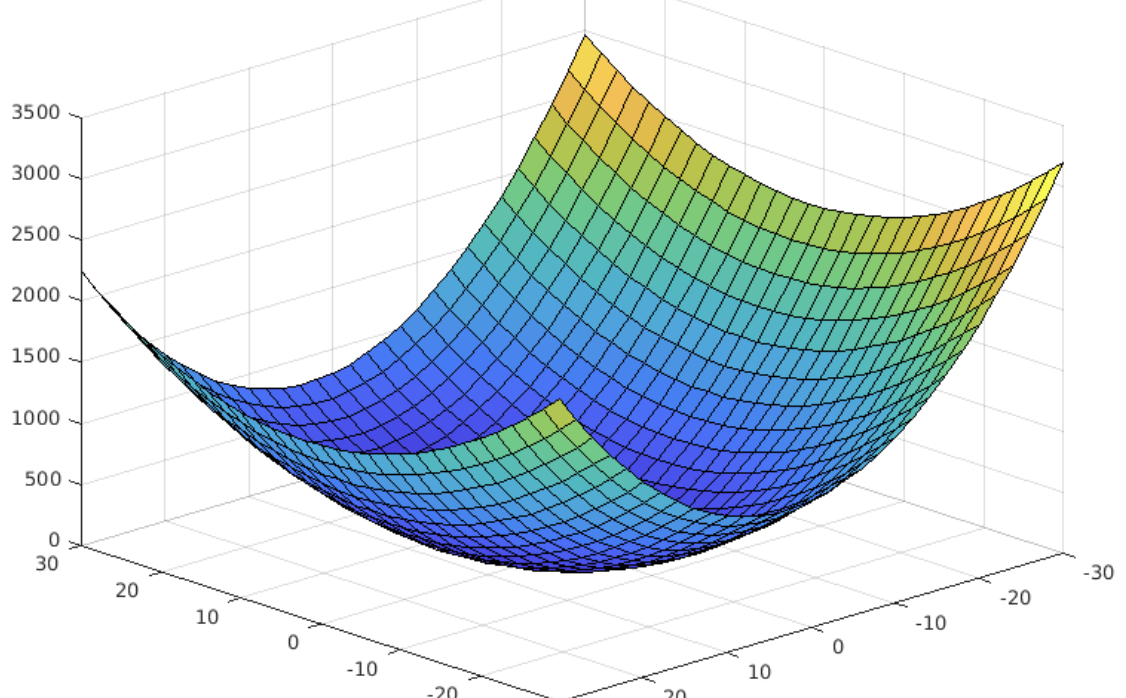



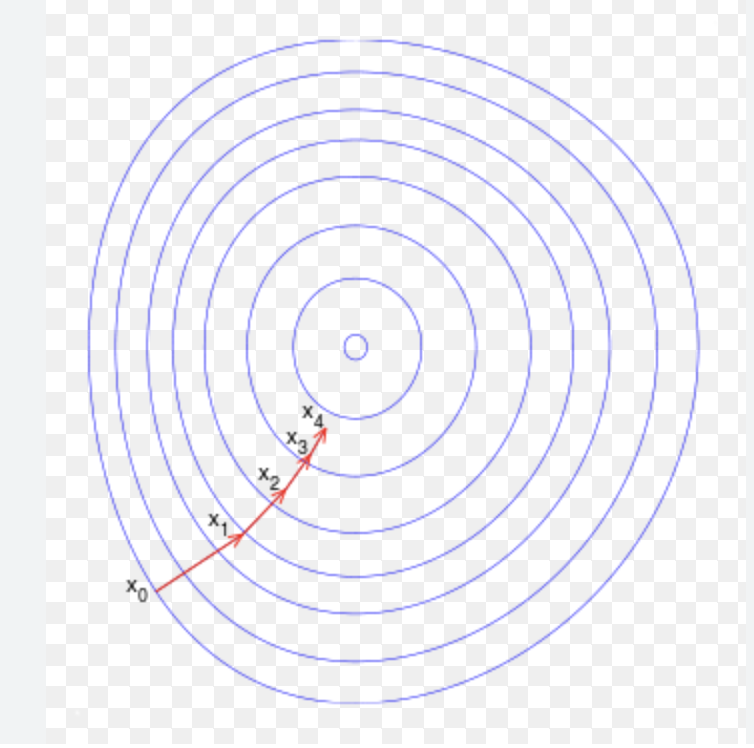

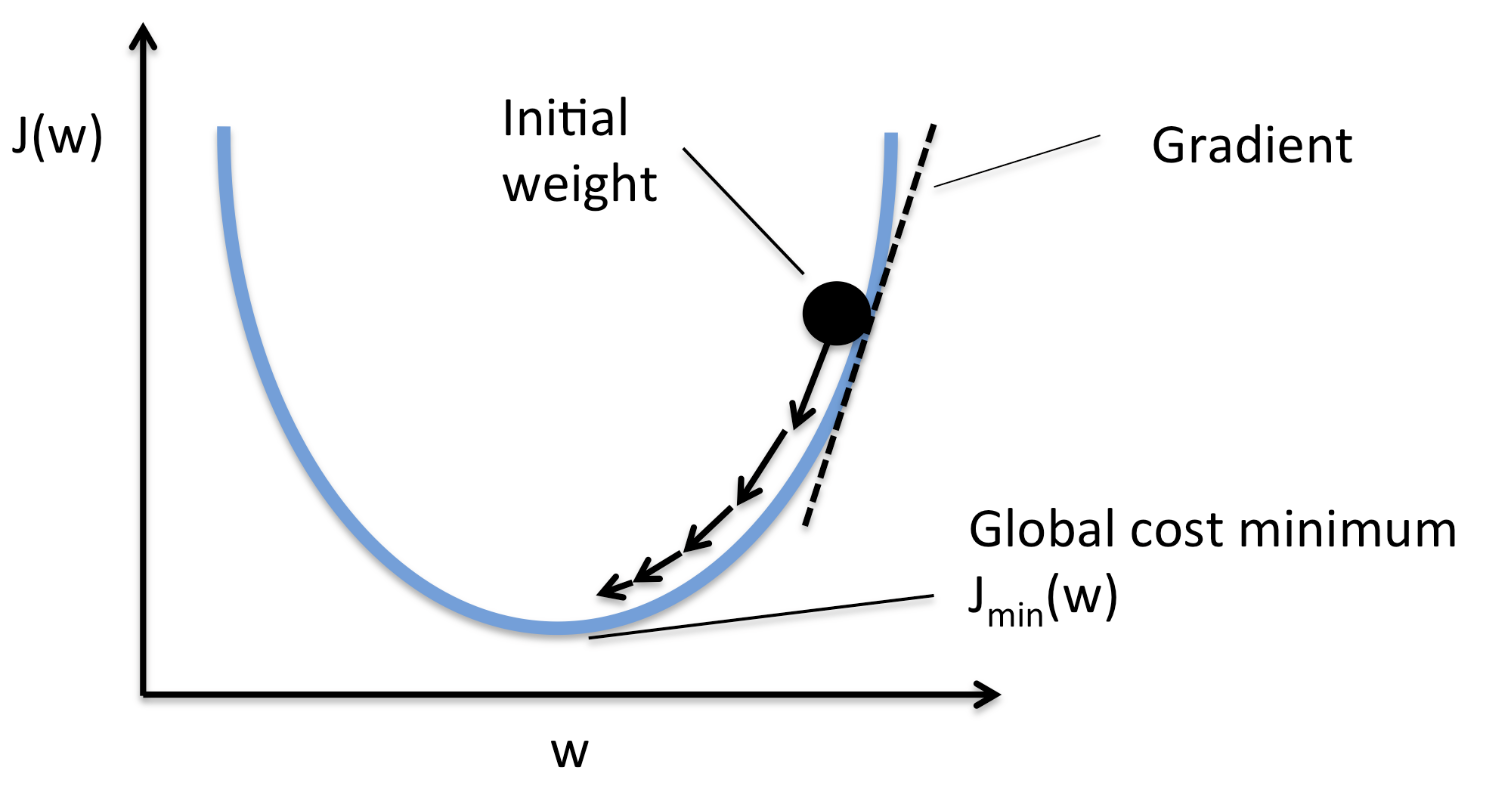



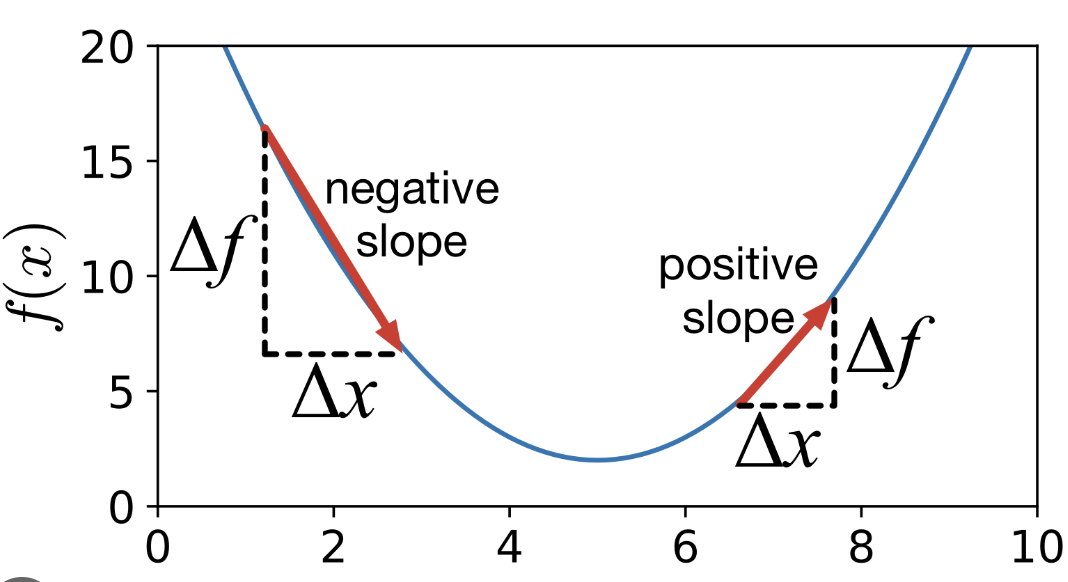

##  Signs of a good loss or objective function -  A good loss function should be 1) convex 2)  continuous and differentiable 

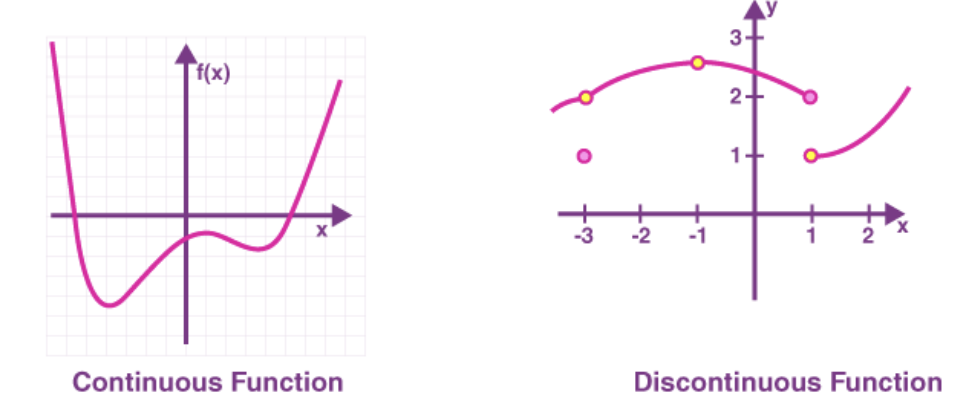

# Let's understand graphically what we are trying to achieve

# Gradient Descent for Linear regression 

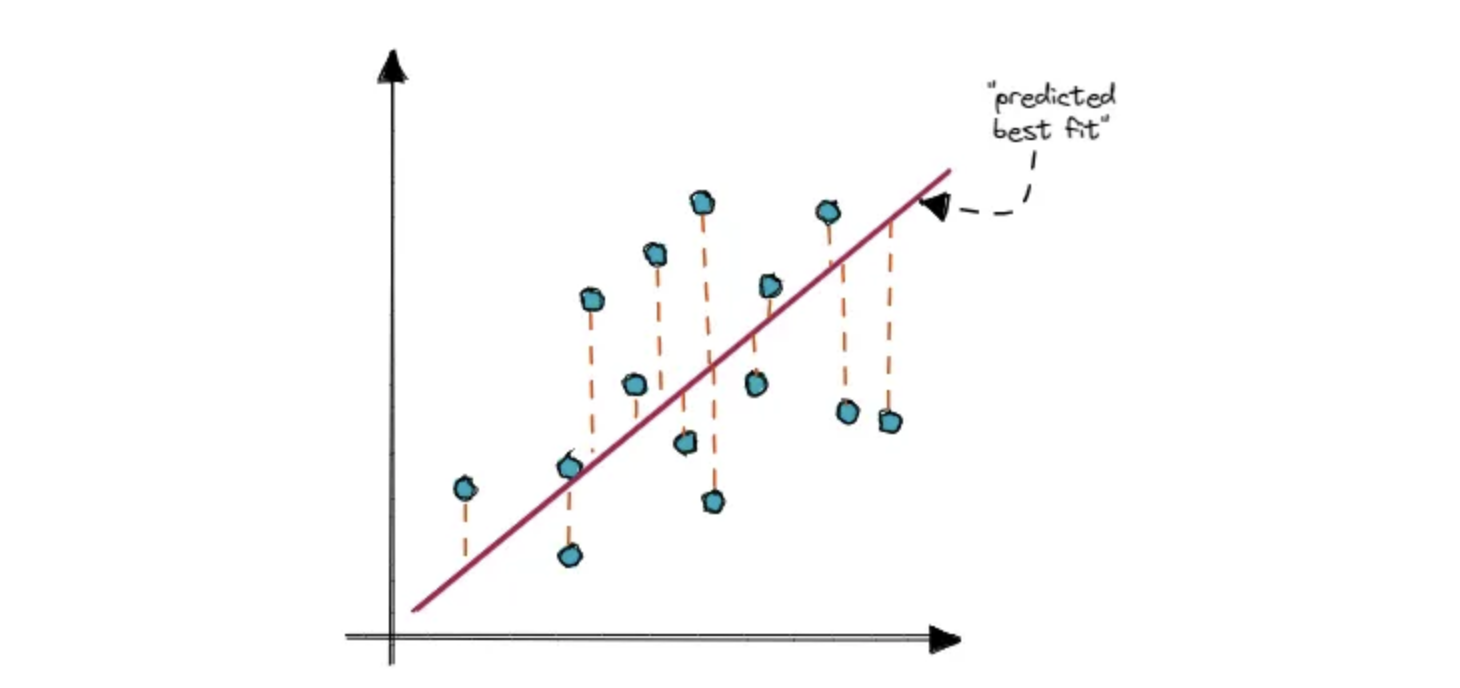

### Loss function for a Linear Regression 

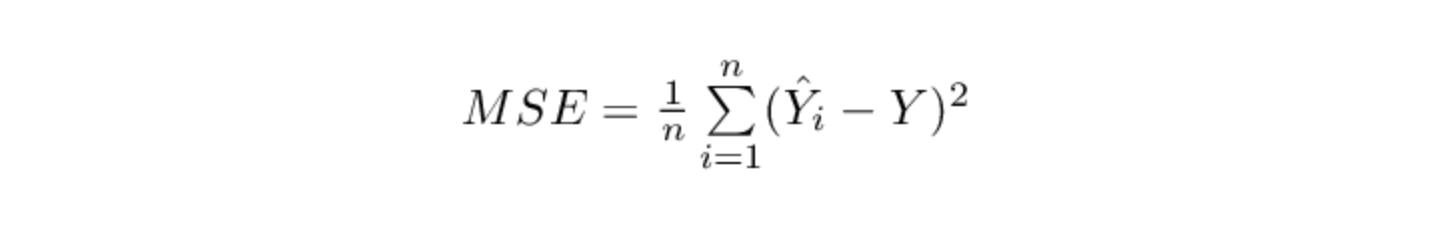

### Linear regression line and cost function 





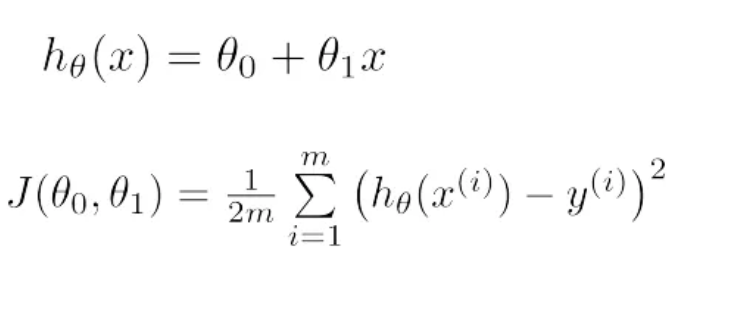

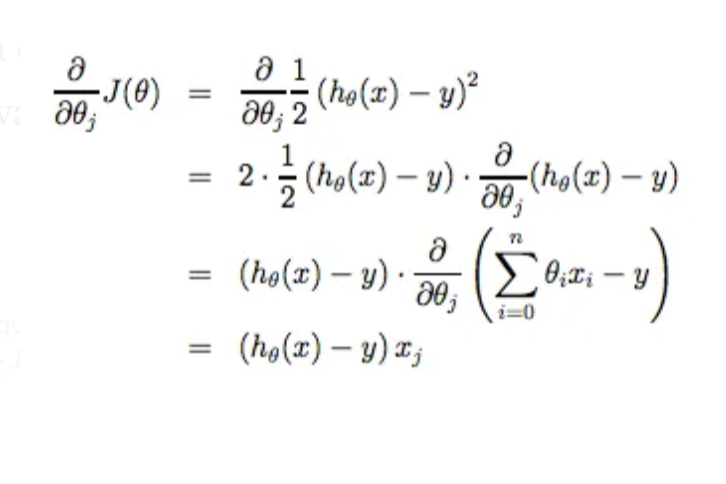

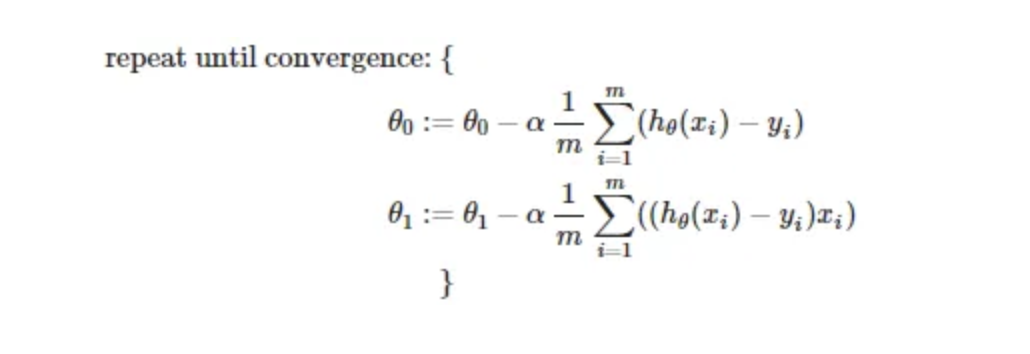

### Lets code Gradient Descent Without using any Python Package ( Optimize linear regression ) 

In [3]:
import pandas as pd
import numpy as np


# Generate the data for a linear Regression 

In [4]:
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)

m = X.shape[0]
m

# m - Observation 
#n - features 

100

In [5]:
X

array([ 0.24835708, -0.06913215,  0.32384427,  0.76151493, -0.11707669,
       -0.11706848,  0.78960641,  0.38371736, -0.23473719,  0.27128002,
       -0.23170885, -0.23286488,  0.12098114, -0.95664012, -0.86245892,
       -0.28114376, -0.50641556,  0.15712367, -0.45401204, -0.70615185,
        1.73282438,  0.88711185,  1.0337641 ,  0.28762591,  0.72780864,
        1.05546129,  0.42450321,  1.18784901,  0.69968066,  0.85415313,
        0.69914669,  1.92613909,  0.99325139,  0.47114454,  1.41127246,
        0.38957818,  1.1044318 ,  0.02016494,  0.33590698,  1.09843062,
        2.36923329,  2.08568414,  1.94217586,  1.84944815,  1.260739  ,
        1.6400779 ,  1.76968061,  2.52856111,  2.17180914,  1.11847992,
        2.16204198,  1.80745886,  1.661539  ,  2.30583814,  2.51549976,
        2.46564006,  1.58039124,  1.84539381,  2.16563172,  2.48777256,
        2.76041288,  2.90717051,  2.44683251,  2.40189669,  3.40626291,
        3.67812001,  2.96399494,  3.50176645,  3.18081801,  2.67

In [6]:
y

array([-0.35384269, -0.10516133, -0.08567863, -0.20056932, -0.04032143,
        0.10101271,  0.47154648,  0.04364445,  0.0643876 , -0.01861148,
       -0.4796928 , -0.00662847,  0.01505755,  0.61581053, -0.04809024,
        0.07538684, -0.00867794, -0.29216951,  0.2857057 ,  0.18798326,
        1.19775799,  0.77265314,  1.35069858,  0.64953723,  1.14671427,
        1.54761391,  0.75236592,  0.85842557,  1.02491284,  0.87413109,
        0.61233414,  1.01714074,  0.73442407,  1.11839811,  0.77014394,
        1.3874836 ,  0.80418668,  0.91948462,  1.2033793 ,  0.69228392,
        2.05686498,  2.32678569,  1.59812919,  2.04615846,  2.0649707 ,
        2.19545572,  1.69076232,  1.66988585,  2.13048539,  2.07424617,
        2.06262321,  2.08661205,  1.82999382,  2.05806342,  2.07326812,
        1.82141215,  2.46644363,  2.11845823,  1.70217413,  2.1641384 ,
        2.75632958,  3.19677115,  3.28964889,  2.79482942,  3.24084403,
        3.10319523,  3.20551504,  3.47419825,  2.93865297,  2.81

In [7]:
# Set HyperParameter

learning_rate=0.01
epochs=100

#Initialize 
theta0 = 0
theta1 = 0

listtheta0 = []
listtheta1 = []

losslist =  []

YCap = np.zeros((epochs,100))

for i in range(epochs):
    theta0_gradient =    np.sum( (theta1*X + theta0) - y ) / m
    theta1_gradient =    np.sum(X*( (theta1*X + theta0) - y )) / m
    theta0 = theta0 - (learning_rate * theta0_gradient)
    theta1 = theta1 - (learning_rate * theta1_gradient)
    #store interim theta0 and theat1
    listtheta0.append(theta0)
    listtheta1.append(theta1)
    #  Store Y Pred at every iteration 
    YCap[i] = theta1*X + theta0
    # Loss at every iteration 
    MSE = np.sum(np.square((theta1*X + theta0) - y )) / m
    losslist.append(MSE)
    print( "------------for " , i , " iteration ----------------")
    print("MSE is " , MSE)
    print(" theta0 and theta1 are  ", theta0 , "  ", theta1)
    
    
## /2m in loss or 1/2 in claculating the gradient doesnt matter much as those are constant. Slope of the regression line
# will still remain the same.
 
## Show why negative of the gradient is the path of steepest slope downhill by changing sign to +
    
    



------------for  0  iteration ----------------
MSE is  5.313372467984465
 theta0 and theta1 are   0.02005576146762481    0.05942808629785439
------------for  1  iteration ----------------
MSE is  4.652544966347151
 theta0 and theta1 are   0.03875326059360342    0.11483737448687882
------------for  2  iteration ----------------
MSE is  4.078084346144538
 theta0 and theta1 are   0.05618436927259034    0.16649967298342613
------------for  3  iteration ----------------
MSE is  3.578702881091401
 theta0 and theta1 are   0.07243474564375364    0.21466840651097646
------------for  4  iteration ----------------
MSE is  3.144588095185208
 theta0 and theta1 are   0.0875842543567749    0.2595798594769676
------------for  5  iteration ----------------
MSE is  2.7672099547532043
 theta0 and theta1 are   0.10170735841325426    0.30145433525411863
------------for  6  iteration ----------------
MSE is  2.439153259550244
 theta0 and theta1 are   0.11487348450601162    0.34049723705402685
------------fo

<IPython.core.display.Javascript object>


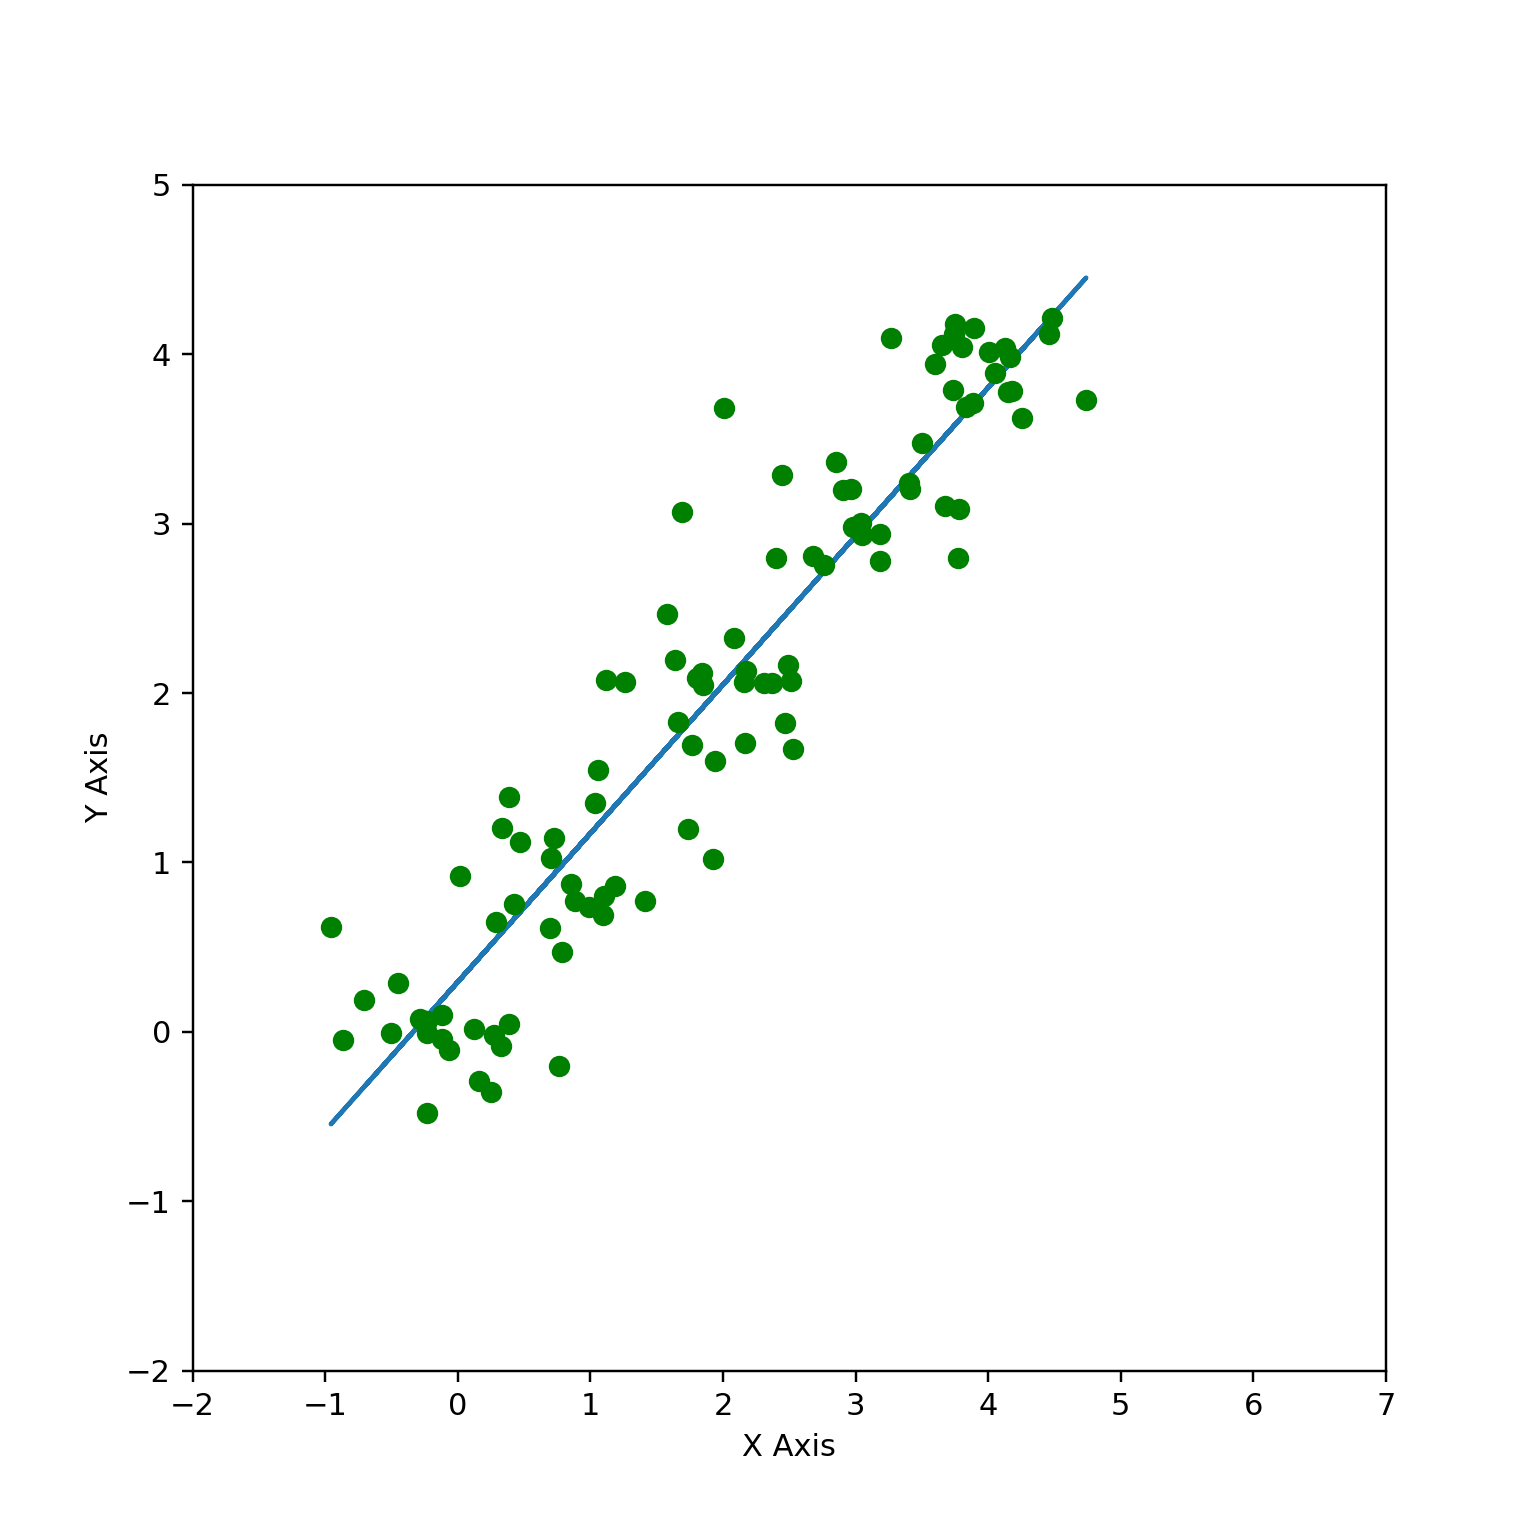

In [12]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()


line, = ax.plot(X, YCap[0])

plt.rcParams["figure.figsize"] = (7,7)
plt.ylabel("Y Axis")
plt.xlabel("X Axis")
plt.ylim(-2, 5)
plt.xlim(-2,7)
plt.plot(X, y, 'go', label='Training data')


def animate(i):
    print(i)    
    line.set_xdata(X)  # update the data
    line.set_ydata(YCap[i])  # update the data
    return line,


ani = animation.FuncAnimation(fig, animate, frames=np.arange(1, epochs), interval=100 ,repeat = False )
plt.show()

<IPython.core.display.Javascript object>


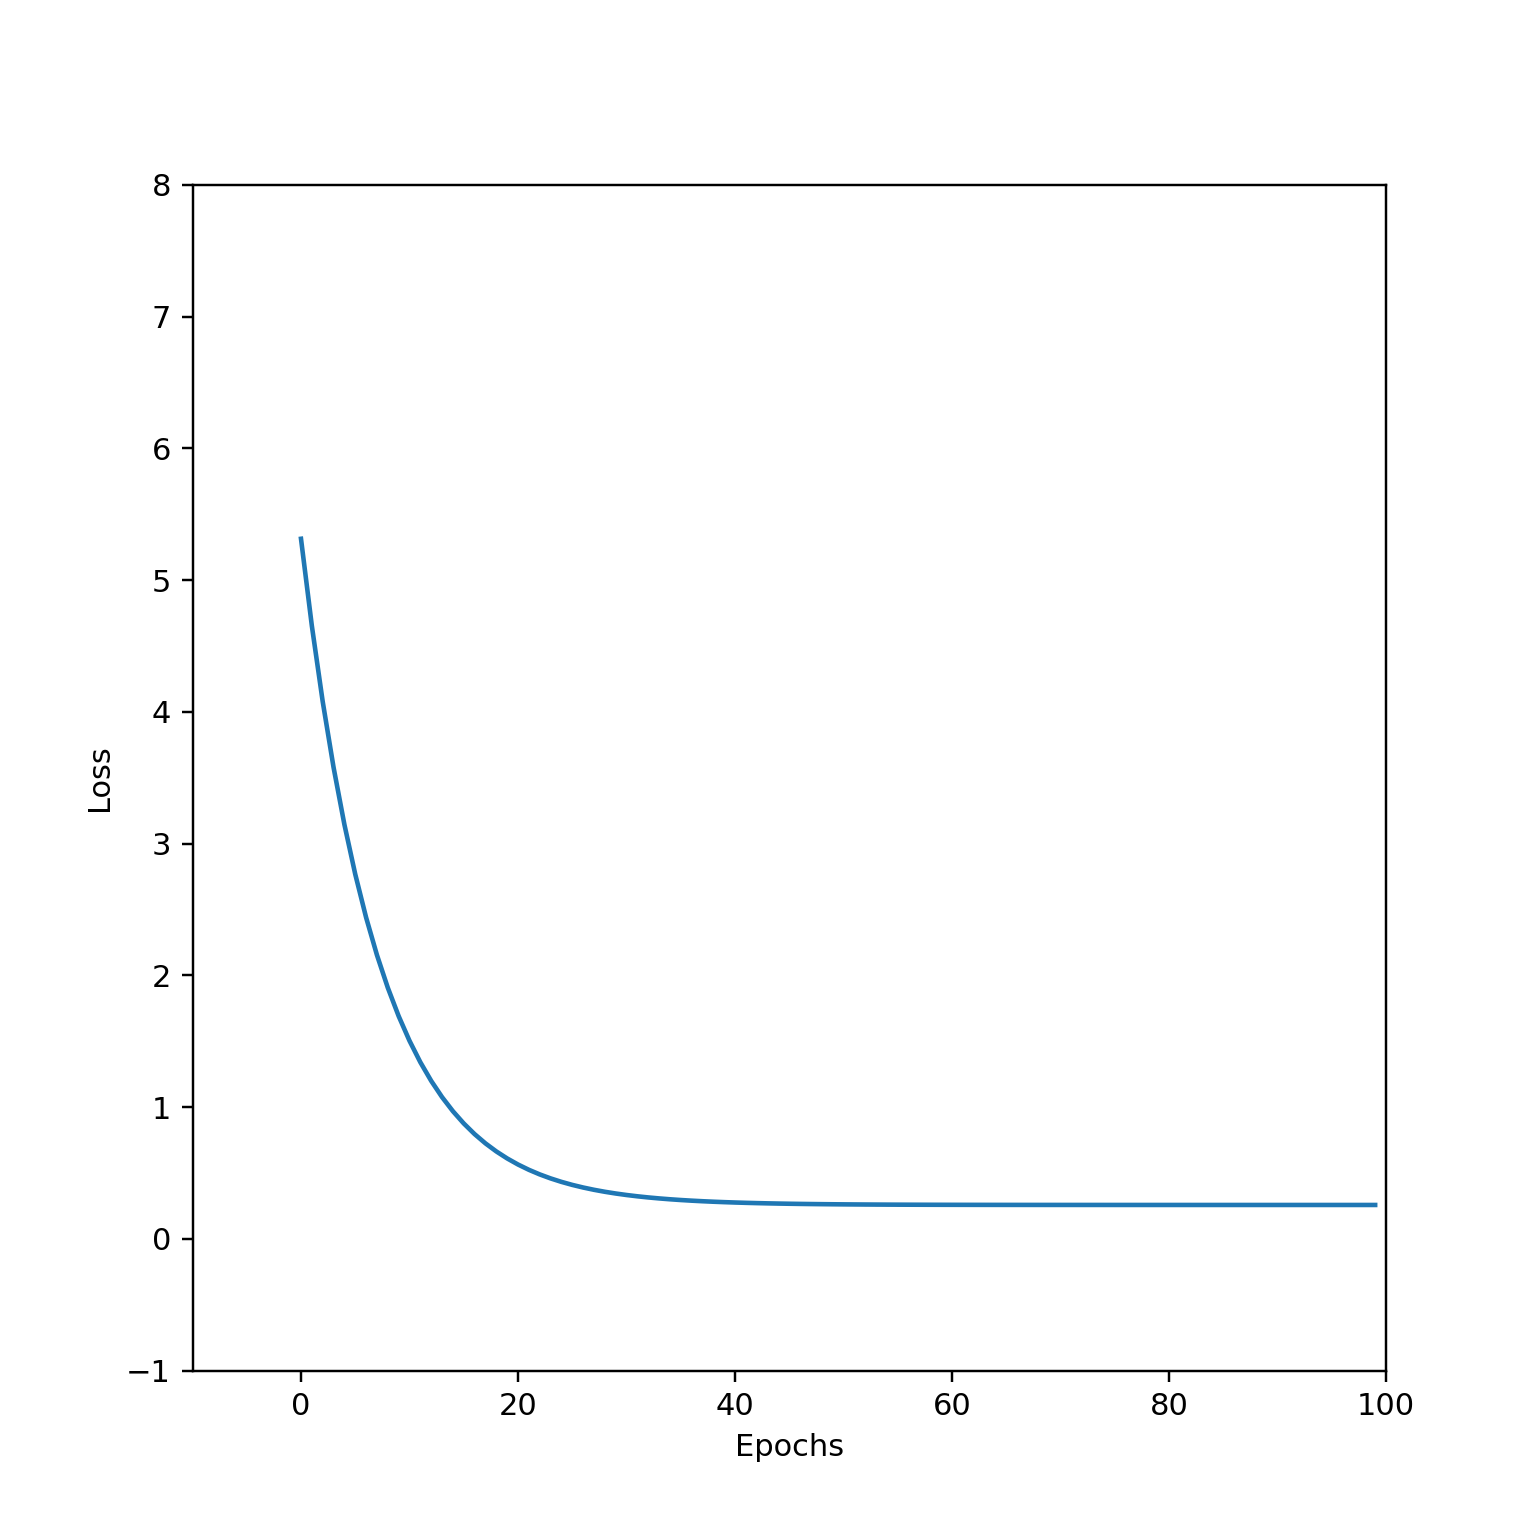

In [13]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (7,7)
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.ylim(-1, 8)
plt.xlim(-10,100)
plt.plot(np.arange(epochs), losslist, marker=".", markersize=0.001, label='Loss vs epochs')

In [10]:
## Validate it using SKLearn 

In [14]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

lm2 = LinearRegression()
X1 = X.reshape(-1, 1)
y1 = y.reshape(-1, 1)

# Fit Model
lm2.fit(X1, y1)
# Predict
y_pred = lm2.predict(X1)
# MSE
print('MSE: ',metrics.mean_squared_error(y1, y_pred))

print( "Theta1 is " ,lm2.coef_ , " Theta0 is " , lm2.intercept_  )

MSE:  0.2570945882496555
Theta1 is  [[0.88128896]]  Theta0 is  [0.28875762]
